# TP2

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#### Question 1

In [2]:
df = pd.read_csv("data_dm3.csv", names = ["X" + str(x) if x != 211 else "Y" for x in range(1, 212)])
dfX = df.drop(['Y'], axis='columns')
dfY = df.loc[:,["Y"]]

X_numpy = dfX.to_numpy()
Y_numpy = dfY.to_numpy()
Ytest2 = []
for element in Y_numpy:
    Ytest2.append(element[0])
Y_numpy = np.array(Ytest2)

df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X202,X203,X204,X205,X206,X207,X208,X209,X210,Y
0,0.567079,-0.091771,0.942371,-0.030515,-0.019217,0.391255,-0.864165,-0.399603,-0.494114,0.102664,...,-0.894318,-0.708800,0.281710,0.675912,1.015439,-1.106764,-0.028615,1.197579,-1.443292,151.0
1,-0.331488,-1.366750,0.114985,-0.205337,0.210889,0.477003,1.297167,1.112617,0.724504,0.150256,...,-0.695968,1.035641,-1.468597,-0.100480,-0.529577,0.464928,-0.408192,-1.011776,0.828507,75.0
2,-1.551211,0.694657,-0.958020,-0.499934,0.421997,0.398816,-0.164748,-1.122560,0.804680,0.172628,...,0.127114,-1.868818,0.256579,0.276417,1.415106,0.222125,-0.949045,0.902216,-0.126379,141.0
3,0.072708,1.309862,-1.718245,0.815730,0.337922,-1.518135,0.733924,-0.626778,0.625016,-0.021714,...,1.414900,-0.169861,-0.487848,0.601895,-0.794737,1.187445,0.340078,-0.620887,1.136428,206.0
4,0.516270,0.670153,0.023550,1.328635,-0.875556,-0.080188,-1.716643,1.063847,-0.548071,0.944563,...,0.867714,-0.645727,1.263969,-0.651965,0.299442,0.312629,0.812089,0.302794,-0.119473,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,-1.684065,0.017365,0.083803,-0.665017,0.306270,1.046941,-0.996450,0.617942,0.720627,0.311295,...,0.972751,-0.491750,0.489360,0.733823,0.254728,-0.681618,1.625224,-0.614416,-0.326057,178.0
438,-0.985487,0.378380,-2.483441,0.537348,1.850172,-0.022862,2.249594,-1.411524,1.755130,-0.089083,...,-1.234965,-1.084280,-2.801451,1.678528,0.598202,0.716723,-2.829058,0.936472,0.637250,104.0
439,1.656549,0.804088,-0.217134,2.344321,-0.488692,-0.430310,-1.013313,-0.195536,-0.984663,1.000962,...,-0.490450,-1.116473,0.222386,0.254800,0.798915,-0.277827,-0.406886,1.250858,-1.388868,132.0
440,-0.636382,-1.591981,2.663763,0.437529,-1.167818,1.223134,-1.610570,1.369835,0.546270,2.562763,...,0.250938,-1.404683,1.507997,-0.042924,0.702338,0.035967,1.259139,0.625545,-2.473085,220.0


Notre problème contient :
- card(X) = 210 variables explicative 
- n = 442 observations (nombre de patients)

#### Question 2

In [3]:
moyennes = df.mean()
moyenne_Y = moyennes[-1]
moyennes = moyennes.drop(labels = ["Y"])

previous_value = moyennes[0]
moyenne_nul = np.allclose(0.0, previous_value, 0.01)
for moyenne in moyennes:
    moyenne_nul = moyenne_nul & np.allclose(previous_value, moyenne, 0.01)
    previous_value = moyenne
print("Les variables explicatives sont-elles centré ? " + str(moyenne_nul))
print("La moyenne de Y vaut : " + str(moyenne_Y) + ", donc Y n'est pas centré")

ets = df.std()
ets_Y = ets[-1]
ets = ets.drop(labels = ["Y"])

previous_value = ets[0]
ecart_type_1 = np.allclose(1.0, previous_value, 0.01)
for et in ets:
    ecart_type_1 = ecart_type_1 & np.allclose(previous_value, et, 0.01)
    previous_value = et
print("Les variables explicatives sont-elles normalisé ? " + str(ecart_type_1))
print("L'écart type de Y vaut : " + str(ets_Y) + ", donc Y n'est pas normalisé")

Les variables explicatives sont-elles centré ? True
La moyenne de Y vaut : 152.13348416289594, donc Y n'est pas centré
Les variables explicatives sont-elles normalisé ? True
L'écart type de Y vaut : 77.09300453299109, donc Y n'est pas normalisé


['X94', 'X150', 'X97', 'X203']


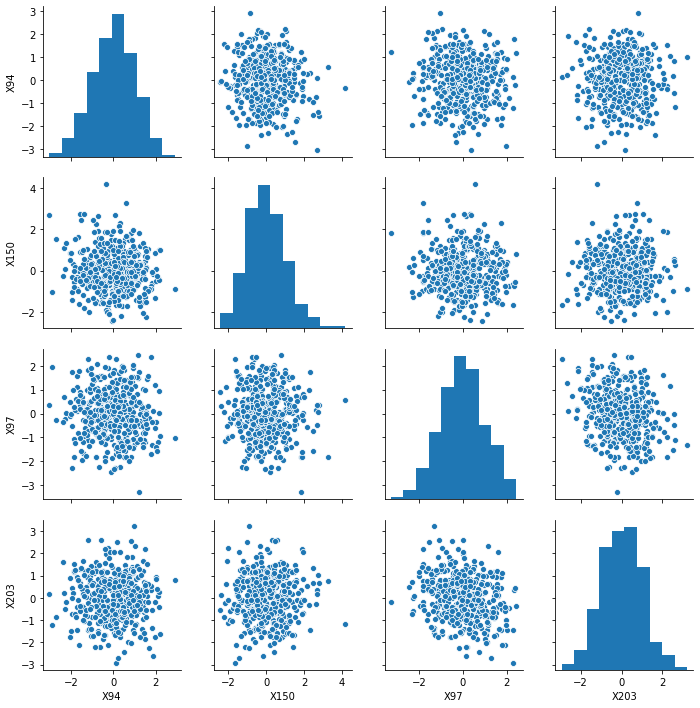

In [4]:
x = []
for i in range(4):
    x.append("X" + str(rd.randrange(1, 210)))
print(x)

sb.pairplot(df[x])

La distribution des variables explicatives semble homogène

#### Question 3

Dans cette question, je tire un train set de 75% et un test set de 25% aléatoirement.

In [5]:
xtrain = []
while(len(xtrain) < 332):
    rand = rd.randrange(442)
    if not(rand in xtrain):
        xtrain.append(rand)
xother = [i for i in range(442) if not(i in xtrain)]

Xtrain = pd.DataFrame(dfX.loc[xtrain])
Xtest = pd.DataFrame(dfX.loc[xother])

Ytrain = pd.DataFrame(dfY.loc[xtrain])
Ytest = pd.DataFrame(dfY.loc[xother])

print("Taille de l'échantillon d'apprentissage : " + str(len(Xtrain)))
print("Taille de l'échantillon de test : " + str(len(Xtest)))

Taille de l'échantillon d'apprentissage : 332
Taille de l'échantillon de test : 110


#### Question 4

Matrice de covariance :

In [6]:
Xtrain.cov()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210
X1,0.947179,0.230241,0.009869,0.342635,-0.068911,-0.346657,-0.173621,0.066396,-0.504636,-0.245428,...,-0.545754,-0.388367,0.210287,-0.124366,-0.009837,0.109518,-0.129105,-0.172535,0.323498,0.158103
X2,0.230241,0.974910,-0.699607,0.182365,0.526379,-0.321567,-0.262911,-0.492067,-0.106528,-0.304128,...,-0.502740,0.190947,-0.321760,0.194813,0.266072,0.116542,0.031895,-0.115564,0.428136,0.336974
X3,0.009869,-0.699607,0.985599,-0.362999,-0.711040,0.091811,-0.237064,0.339311,-0.123037,0.156797,...,0.473747,0.056069,0.195524,0.350495,-0.258006,-0.044458,-0.151978,0.410210,-0.071760,-0.468512
X4,0.342635,0.182365,-0.362999,0.968430,0.338649,0.136240,0.054423,0.159029,-0.020223,0.579563,...,-0.541939,-0.338275,-0.277448,-0.228861,0.014891,0.079365,0.234540,-0.401998,0.159885,-0.146108
X5,-0.068911,0.526379,-0.711040,0.338649,0.985335,0.217212,0.271932,-0.252179,0.167001,0.067766,...,0.057236,-0.220798,-0.146373,-0.203375,0.177630,-0.072350,0.155173,-0.392945,0.033092,0.275061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X206,0.109518,0.116542,-0.044458,0.079365,-0.072350,0.220669,-0.584637,0.290881,-0.051763,0.086863,...,-0.248225,-0.390800,-0.570267,-0.146514,0.264303,0.979847,-0.296184,-0.025455,0.398360,0.016631
X207,-0.129105,0.031895,-0.151978,0.234540,0.155173,-0.488429,0.440696,0.005159,0.778655,0.572706,...,-0.100079,0.436003,-0.341502,-0.136201,0.201100,-0.296184,1.049865,-0.139524,0.095592,0.365995
X208,-0.172535,-0.115564,0.410210,-0.401998,-0.392945,-0.094556,-0.418064,0.342800,0.049039,-0.036093,...,0.153628,0.545288,0.099946,0.310110,0.108297,-0.025455,-0.139524,0.940677,-0.377647,0.039424
X209,0.323498,0.428136,-0.071760,0.159885,0.033092,-0.360555,-0.357197,-0.360083,0.095274,0.010956,...,-0.277962,-0.055239,-0.618427,0.096725,0.443533,0.398360,0.095592,-0.377647,1.034033,-0.147257


In [7]:
Xtrain_numpy = Xtrain.to_numpy()
Xtest_numpy = Xtest.to_numpy()

Ytrain_numpy = Ytrain.to_numpy()
Ytest_numpy = Ytest.to_numpy()

#obliger de faire ce traitement sinon le format des tableaux numpy n'était pas satisfaisant
Ytest2 = []
for element in Ytrain_numpy:
    Ytest2.append(element[0])
Ytrain_numpy = np.array(Ytest2)

Ytest2 = []
for element in Ytest_numpy:
    Ytest2.append(element[0])
Ytest_numpy = np.array(Ytest2)


covariance = np.cov(Xtrain_numpy.transpose())
valp, vectp = np.linalg.eigh(covariance)
valp = np.flip(np.sort(valp, axis=None))

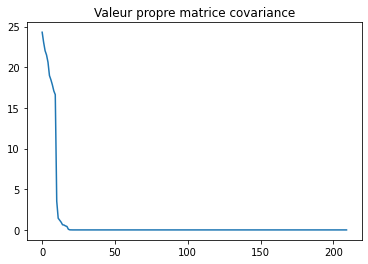

In [8]:
plt.plot(valp)
plt.title('Valeur propre matrice covariance')
plt.show()

Les première valeurs de l'ACP sont celles qui vont peser le plus dans les variables explicatives, les autres sont presques nuls. On prend pour la suite k = 10 variables (on peut trouver cette valeur à l'aide de la méthode du coude).

#### Question 5

In [9]:
pca = PCA(n_components = 10)
fit = pca.fit(Xtrain)
vectp = fit.components_
valp = fit.explained_variance_

Coefficient de la regression après l'ACP :

In [10]:
model1 = LinearRegression(fit_intercept=True)
Xacp = np.dot(Xtrain_numpy, np.transpose(vectp))
result1 = model1.fit(Xacp, Ytrain_numpy)

result1.coef_

array([ 2.24532598,  1.52125715, -0.33032613, -2.38342643, -0.18744573,
       -0.03577381, -1.20146761,  0.91428881,  0.37504244, -0.22157597])

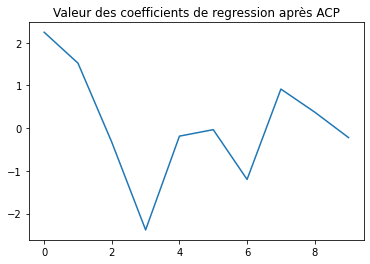

In [11]:
plt.plot(result1.coef_)
plt.title("Valeur des coefficients de regression après ACP")
plt.show()

Coefficient de la regression :

In [12]:
model2 = LinearRegression(fit_intercept=True)
result2 = model2.fit(Xtrain_numpy, Ytrain_numpy)

result2.coef_

array([ 4.04872090e+13,  8.58190526e+14, -1.48812355e+15, -1.11257699e+15,
        1.13990722e+15, -1.90527799e+14, -1.32239159e+15,  1.59171358e+15,
        6.25242358e+14, -2.79195633e+15,  1.22308732e+15,  1.16571045e+01,
       -4.41406511e+14, -5.47482298e+14,  4.88014034e+14,  1.59584054e+15,
        3.01335766e+14, -1.23761190e+14,  1.19325018e+14,  1.93771616e+14,
        4.29778754e+13,  9.68289540e+13,  2.95069690e+14,  2.12918231e+14,
       -3.20227392e+14, -1.41926616e+14, -1.50879843e+14,  2.33953989e+13,
        1.58125000e+01,  8.65056823e+13, -7.92829147e+13, -8.31564505e+13,
        1.47287439e+14, -1.12148108e+14,  2.57544106e+14, -5.79268260e+14,
       -3.10756679e+13,  5.83323280e+13, -1.75022670e+14, -8.84986820e+13,
       -3.18025335e+13, -1.82237472e+13, -4.27656204e+13,  1.09536672e+14,
       -3.68494187e+14,  1.00087250e+14, -1.68774521e+14, -4.13567998e+14,
        1.64420545e+14,  1.98673095e+14,  2.82862510e+14,  1.85719908e+13,
       -1.46496407e+13,  

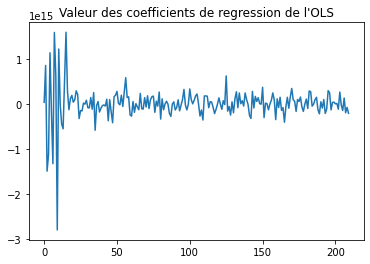

In [13]:
plt.plot(result2.coef_)
plt.title("Valeur des coefficients de regression de l'OLS")
plt.show()

#### Question 6

Moyenne de la valeur Y:

In [14]:
np.mean(Ytrain_numpy)

152.83734939759037

Valeur de l'intercepte:

In [15]:
Xacp_standard = StandardScaler().fit_transform(Xacp)

model3 = LinearRegression(fit_intercept=True)
result3 = model3.fit(Xacp_standard, Ytrain_numpy)

result3.intercept_ 

152.83734939759037

On a bien égalité entre l'intercept et la moyenne de Y !(l'intercept repésentant l'ordonnée à l'origine, c'est cohérent)

#### Question 7

Calcul du vecteur des résidus pour l'OLS :

In [16]:
Ypredit_OLS = result2.predict(Xtest_numpy)

Yresidu_OLS = Ytest_numpy - Ypredit_OLS

Yresidu_OLS

array([ -10.42914627,   -5.6967244 ,   30.8032756 ,  -36.6967244 ,
        -43.8842244 ,  -53.1967244 ,  -20.9467244 ,    5.8032756 ,
        -97.1967244 ,  -52.6967244 ,   67.8032756 ,    1.8032756 ,
          4.8032756 ,  -70.9467244 ,  -12.6967244 ,   65.8032756 ,
        -33.9467244 ,  -13.1967244 ,   47.5532756 ,   38.8032756 ,
         93.5532756 ,   23.8032756 ,  -47.1967244 ,   -4.1967244 ,
         -3.1967244 ,  -53.1967244 ,   50.8032756 ,  -55.1342244 ,
        -33.1967244 ,  -77.5717244 ,   41.8032756 ,  -14.0717244 ,
        -95.5717244 ,   47.3032756 ,    9.2407756 ,  -29.2435994 ,
        -31.0717244 ,  -85.6967244 ,  -59.1967244 ,   11.0220256 ,
         -6.6967244 ,   17.1782756 ,   43.6782756 ,   -7.1967244 ,
         -1.4467244 ,   61.8032756 ,   39.8032756 ,   16.8032756 ,
        -82.6654744 ,   30.8032756 , -147.6967244 ,  -75.0717244 ,
        -63.1967244 ,  -41.1967244 ,    0.8032756 ,   22.8032756 ,
          1.8032756 ,   -3.1967244 ,   96.8032756 ,   -8.19672

Calcul du vecteur des résidus pour l'ACP avant l'OLS :

In [17]:
Ypredit_ACP = result1.predict(np.dot(Xtest_numpy, np.transpose(vectp)))

Yresidu_ACP = Ytest_numpy - Ypredit_ACP

Yresidu_ACP

array([-1.78562690e+01, -5.51909388e+01,  2.30200455e+01, -1.10792354e+01,
       -2.71756723e+01, -8.49778775e+01, -1.08050182e+02,  3.33540975e+01,
       -8.42185491e+01, -7.10182962e+01,  1.41056301e+02,  7.78809431e+01,
       -6.26776568e+01, -1.11970640e+02, -7.79378311e+00,  8.48953435e+01,
       -3.49546993e+01, -1.54641608e+01, -1.45392144e+01,  9.80698607e+01,
        6.79295712e+01, -4.85265073e+01, -2.10148184e+01, -1.04651036e+02,
       -3.63394534e+01, -9.14479363e+01, -4.38840062e+01,  2.70603941e+00,
       -5.00114132e+01, -9.88715236e+01,  1.42888542e+02,  1.30381083e+01,
       -6.10246415e+01,  1.13607385e+02, -4.54534334e+01, -5.95556966e+01,
       -2.58842126e+01, -2.83196056e+00, -6.15436886e+01,  4.61755861e+01,
        3.51130974e+01, -9.19845203e+01,  1.22872060e+02,  3.54331139e+00,
       -4.59907989e+01,  9.46924871e+00,  1.65697823e+01,  7.05995701e+00,
       -4.05525996e+01,  7.58586282e+01, -6.90917471e+01, -1.00189741e+00,
       -1.09256927e+02, -

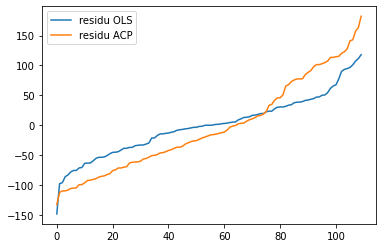

In [18]:
plt.plot(np.sort(Yresidu_OLS), label = 'residu OLS')
plt.plot(np.sort(Yresidu_ACP), label = 'residu ACP')
plt.legend()

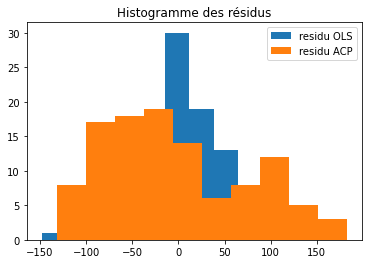

In [19]:
plt.hist(Yresidu_OLS, label = 'residu OLS')
plt.hist(Yresidu_ACP, label = 'residu ACP')
plt.title("Histogramme des résidus")
plt.legend()

R2 de l'ACP avant OLS et R2 de l'OLS

In [20]:
r2ACP = r2_score(Ytest_numpy, Ypredit_ACP)
r2ACP

-0.001664758887401696

In [21]:
r2OLS = r2_score(Ytest_numpy, Ypredit_OLS)
r2OLS

0.5721713237260837

Risque de prédiction sur le test set de l'ACP avant OLS puis risque de prédiction de OLS

In [22]:
risque_ACP = 0
Yresidu_test_ACP = Ytest_numpy - result1.predict(np.dot(Xtest_numpy, np.transpose(vectp)))
for y in Yresidu_test_ACP:
    risque_ACP += y**2
risque_ACP = risque_ACP / len(Ytest)
risque_ACP

5849.14842839467

In [23]:
risque_OLS = 0
Yresidu_test_OLS = Ytest_numpy - result2.predict(Xtest_numpy)
for y in Yresidu_test_OLS:
    risque_OLS += y**2
risque_OLS = risque_OLS / len(Ytest)
risque_OLS

2498.274404930973

#### Question 8

Implémentation de la méthode forward des slide du cours. 1ere fonction : tstat, seconde : selection des variables

In [24]:
def tstatistique(coeff, residus, Xk):
    sigma_chapeau = ((np.linalg.norm(residus))**2)/(len(Xk) - 1)
    tstat = coeff / (sigma_chapeau**(1/2) * np.dot(Xk.T, Xk)**(-1/2))
    return tstat

In [25]:
def forwardVS(X, Y, k):
    X_forward = []
    index_select = []
    predict = Y
    X_scaled = preprocessing.scale(X)
    while(len(X_forward) < k):
        max_tstat = 0
        i = 0
        for column in X_scaled.T:
            if i in index_select:
                i += 1
                continue
            predict_scaled = preprocessing.scale(predict)
            model4 = LinearRegression(fit_intercept=False)
            result4 = model4.fit(column.reshape(-1, 1) , predict)
            residus = predict - result4.predict(column.reshape(-1, 1))
            tstat = tstatistique(abs(result4.coef_[0]), residus, column)
            if(tstat>max_tstat):
                max_tstat = tstat
                var_select = column
                predict = residus
                index = i
            i += 1
        X_forward.append(var_select)
        index_select.append(index)
    X_forward = np.array(X_forward).T
    return X_forward, index_select

In [26]:
X_forward , index_select = forwardVS(X_numpy, Y_numpy, 210)

Ordre de sélection des variables :

In [27]:
index_select

[85,
 28,
 179,
 149,
 88,
 155,
 185,
 97,
 121,
 11,
 17,
 144,
 119,
 29,
 47,
 66,
 34,
 39,
 86,
 5,
 52,
 45,
 25,
 22,
 49,
 19,
 114,
 12,
 124,
 79,
 81,
 70,
 141,
 16,
 77,
 174,
 99,
 113,
 43,
 162,
 51,
 7,
 71,
 186,
 21,
 74,
 13,
 102,
 57,
 147,
 168,
 40,
 136,
 80,
 129,
 10,
 146,
 23,
 33,
 208,
 60,
 137,
 192,
 122,
 118,
 62,
 61,
 93,
 172,
 165,
 111,
 177,
 191,
 116,
 175,
 127,
 27,
 148,
 48,
 72,
 195,
 190,
 38,
 101,
 59,
 142,
 4,
 65,
 131,
 78,
 0,
 198,
 156,
 96,
 31,
 139,
 67,
 171,
 130,
 143,
 54,
 207,
 196,
 41,
 184,
 205,
 58,
 169,
 35,
 100,
 200,
 36,
 92,
 64,
 132,
 26,
 128,
 206,
 9,
 209,
 193,
 6,
 89,
 63,
 167,
 106,
 42,
 176,
 157,
 84,
 180,
 204,
 37,
 110,
 103,
 154,
 109,
 163,
 158,
 105,
 152,
 199,
 75,
 15,
 53,
 150,
 125,
 164,
 24,
 32,
 151,
 20,
 112,
 126,
 83,
 68,
 201,
 189,
 56,
 44,
 94,
 120,
 30,
 178,
 108,
 145,
 87,
 90,
 140,
 134,
 188,
 95,
 91,
 159,
 153,
 202,
 173,
 133,
 161,
 166,
 160,
 194,


On garde les dix premières variables afin de pouvoir comparer à l'ACP

In [28]:
X_forward_k_train = X_forward[xtrain,:10]
X_forward_k_test = X_forward[xother,:10]
X_forward_k_train.shape

(332, 10)

#### Question 9

In [29]:
model5 = LinearRegression(fit_intercept=True)
result5 = model5.fit(X_forward_k_train , Ytrain_numpy)

Y_forward = result5.predict(X_forward_k_test)

Yresidu_forward = Ytest_numpy - Y_forward

risque_forward = 0
for y in Yresidu_forward:
    risque_forward += y**2
risque_forward = risque_forward / len(Ytest_numpy)
risque_forward

2398.636624472233

Il s'agit du risque le plus faible en comparaison des autres modes (ACP et OLS). Cette méthode minimise donc le risque.

#### Question 10

Utilisation de la fonction KFold de sklearn

In [30]:
kf = KFold(n_splits = 5, shuffle = True)

X_train_fold = []
X_test_fold = []
Y_train_fold = []
Y_test_fold = []

for train_index, test_index in kf.split(X_numpy):
    X_train_fold.append(X_numpy[train_index])
    X_test_fold.append(X_numpy[test_index])
    Y_train_fold.append(Y_numpy[train_index])
    Y_test_fold.append(Y_numpy[test_index])

#### Question 11

Création d'un algo permettant d'afficher l'évolution du risque en fonction du paramètre lambda. 

In [31]:
def compute_risk(Yvalidation, Ypredict):
    risque = 0
    Yresidu_test = Yvalidation - Ypredict
    for y in Yresidu_test:
        risque += y**2
    risque = risque / len(Yvalidation)
    return risque

In [32]:
def risque_ridge(lamb):
    i = 0
    risque = 0
    for X in X_train_fold :
        model = Ridge(lamb)
        result = model.fit(X, Y_train_fold[i])
        Ypredict = result.predict(X_test_fold[i])
        risque += compute_risk(Y_test_fold[i], Ypredict)
        i += 1
    risque = risque / len(X_train_fold)
    return risque

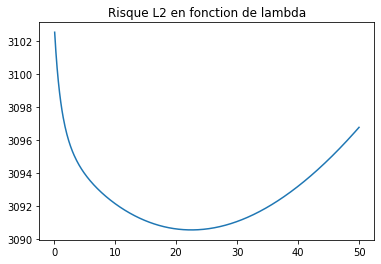

In [33]:
lambda_param = [x/10 for x in range(1, 501)]
risque_associate = []

for lamb in lambda_param:
    risque_associate.append(risque_ridge(lamb))

plt.plot(lambda_param, risque_associate)
plt.title("Risque L2 en fonction de lambda")
plt.show()

In [34]:
def minimum(liste):
    mini = liste[0]
    i = 0
    index = i
    for compare in liste:
        if compare < mini:
            mini = compare
            index = i
        i += 1
    return mini, index

Risque de prédiction minimale sur le test set avec le lambda associé

In [35]:
mini, index = minimum(risque_associate)
lamb = lambda_param[index]
print(mini, lamb)

3090.53971282094 22.5


Lambda optimal d'après la fonction de sklearn RidgeCV

In [36]:
model = RidgeCV(alphas = lambda_param, cv = 5)
result = model.fit(X_numpy, Y_numpy)

alpha_opti = result.alpha_
print(alpha_opti)

22.5


Les deux résultats sont différents. C'est très dépendant de la manière de construire les folds

#### Question 12

Coefficient optimal lambda pour le lasso calculer à l'aide de LassoCV

In [37]:
model_lasso = LassoCV(alphas = lambda_param, cv = 5)
result_lasso = model_lasso.fit(X_numpy, Y_numpy)

alpha_opti = result_lasso.alpha_
print(alpha_opti)

1.5


Risque de prédiction sur le test set du Lasso :

In [38]:
risque_lasso = 0
Yresidu_test_lasso = Ytest_numpy - result_lasso.predict(Xtest_numpy)
for y in Yresidu_test_lasso:
    risque_lasso += y**2
risque_lasso = risque_lasso / len(Ytest)
risque_lasso

2195.619351152026

Le risque de prédiction de LassoCV est le plus faible de toutes les méthodes ! ça semble être la meilleur solution à notre problème (en terme de risque de prédiction).

#### Question 13

On retrouve en output les différentes variables non nulles du lasso ainsi que leur nombre (15).

In [39]:
importance = np.abs(result_lasso.coef_)

lasso_selection = {} 
k = 0
for element in importance : 
    if(element > 0):
        lasso_selection[k] = element 
    k += 1
lasso_selection = sorted(lasso_selection.items(), key=lambda t: -t[1])

print(lasso_selection)
print(len(lasso_selection))

[(85, 24.50385106325176), (179, 23.43876660231001), (28, 13.530846365844097), (11, 10.135607245651016), (121, 8.361196982303952), (185, 3.680911906920161), (155, 2.0166558670818073), (53, 1.7944520377468531), (70, 1.667811557395699), (75, 1.511625146485696), (105, 1.0898163844471458), (110, 1.030499183791252), (5, 0.4094454853707639), (62, 0.21856415767378037), (87, 0.03839899239303592)]
15


Risque de prédiction sur le test set pour le Lasso before OLS

In [40]:
Xtrain_lasso_selec = []
Xtest_lasso_selec = []

for index, coeff in lasso_selection:
    Xtrain_lasso_selec.append((Xtrain_numpy.T)[index])
    Xtest_lasso_selec.append((Xtest_numpy.T)[index])

Xtrain_lasso_selec = np.array(Xtrain_lasso_selec).T
Xtest_lasso_selec = np.array(Xtest_lasso_selec).T

model_lasso_beforeOLS = LinearRegression(fit_intercept=True)
result_lasso_beforeOLS = model_lasso_beforeOLS.fit(Xtrain_lasso_selec , Ytrain_numpy)

Ypredict = result_lasso_beforeOLS.predict(Xtest_lasso_selec)

Yresidu = Ytest_numpy - Ypredict

risque = 0
for y in Yresidu:
    risque += y**2
risque = risque / len(Yresidu)
risque

2313.547609397981

#### Question 14

In [41]:
vrai_index = [119, 121, 85, 28, 185, 149, 11, 88, 179, 155]
i = 0
for index in vrai_index:
    if index in index_select[:10]:
        i += 1
print("La méthode forward a réussi à déterminer  " + str(i) + "  variables")

La méthode forward a réussi à déterminer  9  variables


In [42]:
index_lasso = []
for index, coeff in lasso_selection:
    index_lasso.append(index)
i = 0
for index in vrai_index:
    if index in index_lasso[:10]:
        i += 1
print("La méthode Lasso a réussi à déterminer  " + str(i) + "  variables")

La méthode Lasso a réussi à déterminer  7  variables


Malgré un risque de prédiction plus élevé, la méthode forward semble la plus interessante pour sélectionner les variables explicatives importantes.